# STATISTICS

## Descriptive
- Measures of central Tendency - mean, median, mode
- Measures of Variability - Range, MAD, Variance, STD.   # for find best dataset
- Measures of Shape - Skueness
- Percentiles - persentage, quantile, box plot
- Frequency Distribution - repetation
- Covariance and Correlation - relation between two data

## Inferential
- Central Limit Theorem* and probability
- Hypothesis Testing
-  - Z - Test
   - T - Test
   - Chi Squere test

# Import Librarys

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Datasets

In [2]:
titanic_df = pd.read_csv('../Dataset/titanic.csv')
tips_df = pd.read_csv('../Dataset/tips.csv')

In [3]:
titanic_df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


# Measure of Central Tendency (Median, Mean, Mode)

## Mean

In [4]:
titanic_df['age'].mean()

np.float64(29.69911764705882)

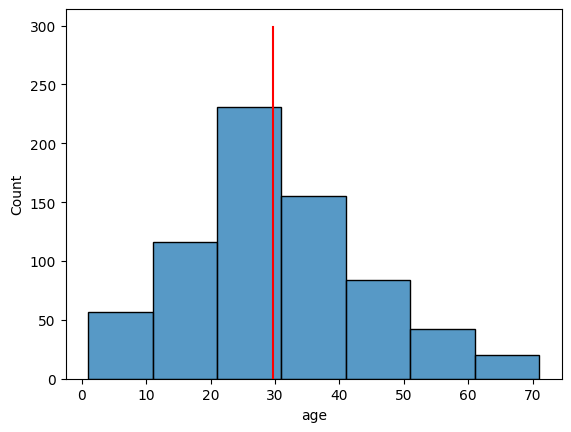

In [5]:
mn = np.mean(titanic_df['age'])
sns.histplot(x = 'age', data=titanic_df, bins=[i for i in range(1, 81, 10)])
plt.plot([mn for i in range(300)], [i for i in range(300)], c = 'red')
 
plt.show()

In [6]:
titanic_df.fillna({'age': titanic_df['age'].mean()}, inplace=True)

## Median

In [7]:
titanic_df['fare'].median()

np.float64(14.4542)

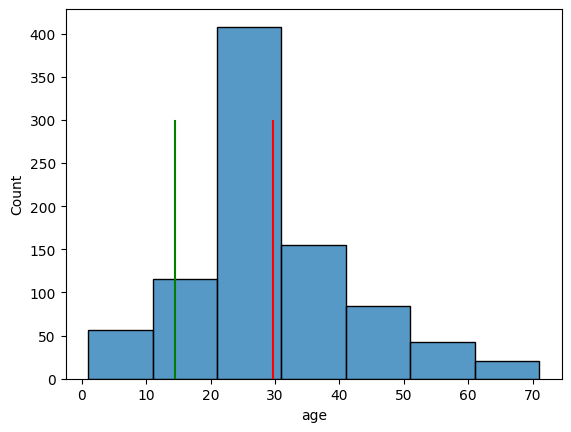

In [8]:
mn = np.mean(titanic_df['age'])
md = np.median(titanic_df['fare'])

sns.histplot(x = 'age', data=titanic_df, bins=[i for i in range(1, 81, 10)])
plt.plot([mn for i in range(300)], [i for i in range(300)], c = 'red')
plt.plot([md for i in range(300)], [i for i in range(300)], c = 'green')

plt.show()

## Mode

In [9]:
mo = titanic_df['fare'].mode()[0]

In [10]:
titanic_df['fare'].value_counts()

fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
13.8583     1
50.4958     1
5.0000      1
9.8458      1
10.5167     1
Name: count, Length: 248, dtype: int64

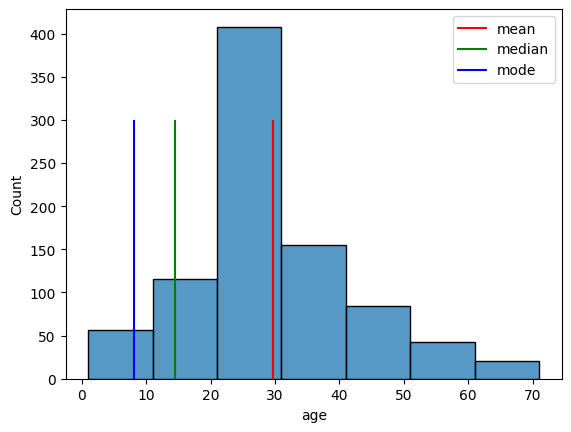

In [11]:
mn = np.mean(titanic_df['age'])
md = np.median(titanic_df['fare'])
mo = titanic_df['fare'].mode()[0]

sns.histplot(x = 'age', data=titanic_df, bins=[i for i in range(1, 81, 10)])
plt.plot([mn for i in range(300)], [i for i in range(300)], c = 'red', label='mean')
plt.plot([md for i in range(300)], [i for i in range(300)], c = 'green', label='median')
plt.plot([mo for i in range(300)], [i for i in range(300)], c = 'blue', label='mode')
plt.legend()

plt.show()

## Range

In [12]:
minimum = titanic_df['age'].min()
maximum = titanic_df['age'].max()

ranges = maximum - minimum
ranges

np.float64(79.58)

# Find Best Dataset

# Measures of Variability

### Note: Whichever database has the lowest standard deviation, MAD, and variance will be the best for us, and we will use that database.

## 1. MAD (Mean Absolute Deviation)

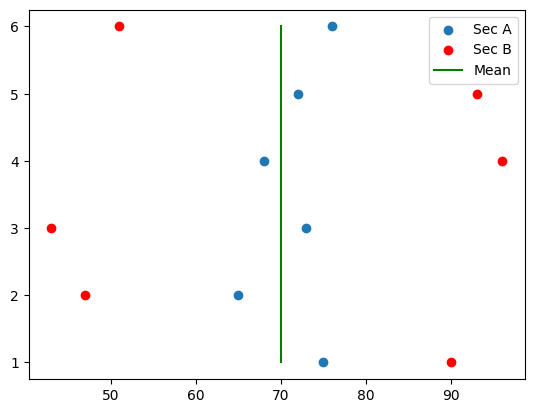

In [13]:
sec_a = np.array([75, 65, 73, 68, 72, 76])
sec_b = np.array([90, 47, 43, 96, 93, 51])
no = np.array([1, 2, 3, 4, 5, 6])
means = np.mean(sec_a) # Both of them mean are same

plt.scatter(x = sec_a, y = no, label='Sec A')
plt.scatter(x = sec_b, y = no, color = 'r', label='Sec B')
plt.plot([70, 70, 70, 70, 70, 70], no, color='green', label='Mean')
plt.legend()

plt.show()

## Mean Absolute Deviation Formula: $$ MAD = \frac{\sum |x_i - \bar{x}|}{n} $$


In [14]:
print(sec_a)
print(sec_a.mean())
print(abs(sec_a.mean()))
np.sum(abs(titanic_df['age'] - titanic_df['age'].mean()))/len(titanic_df['age'])

[75 65 73 68 72 76]
71.5
71.5


np.float64(9.073605334389647)

In [15]:
MAD_a = np.sum(abs(sec_a - sec_a.mean()))/len(sec_a)
MAD_b = np.sum(abs(sec_b - sec_b.mean()))/len(sec_b)

print(MAD_a)
print(MAD_b)

3.3333333333333335
23.0


## 2. Standard Devision Formula: $$ \sigma = \sqrt{\frac{\sum (x_i - \mu)^2}{N}} $$

In [16]:
print(np.std(sec_a), np.std(sec_b))

3.8622100754188224 23.18045153428495


## 3. Variance Formula: $$ \sigma^2 = \frac{\sum (x_i - \mu)}{N} $$

### Note: Standard Devision and Variance both are same there is diffrence is bar -\\|--- or sigma^2 

In [17]:
print(np.var(sec_a), np.var(sec_b))

14.916666666666666 537.3333333333334


### Std ** 2 == Variance

In [18]:
(3.8622100754188224 ) ** 2

14.916666666666666

In [19]:
# Means Squere of STD is Variance

In [20]:
titanic_df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
titanic_df['age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: age, dtype: float64

## Percentile()

In [22]:
np.percentile(titanic_df['age'], 25)

np.float64(22.0)

In [23]:
np.percentile(titanic_df['age'], 75)

np.float64(35.0)

In [24]:
np.percentile(titanic_df['age'], 0) # Minimum Value

np.float64(0.42)

In [25]:
np.percentile(titanic_df['age'], 100) # Maximum Value

np.float64(80.0)

In [26]:
print(titanic_df['age'].median())     # Median
np.percentile(titanic_df['age'], 50)

29.69911764705882


np.float64(29.69911764705882)

In [27]:
titanic_df['age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: age, dtype: float64

## Skewness()

In [28]:
# Skewness stand for how much data is Spred

### Formula of Skewness: $$ \text{Skewness} = \frac{\sum (x_i - \bar{x})^3}{(N - 1) \cdot \sigma^3} $$

### Note: <b>Cumulative Distribution</b> means it is obtained by adding up the frequencies as you move to the value

In [29]:
xis = [1, 3, 5, 7, 8, 9] # 1 + 3 = 4, 4 + 5 = 9, 9 + 7 = 16
cumulative_Distribution_of_xis = [1, 4, 9, 16, 24, 33]

In [30]:
# Negatively skewed / left skewed= mean < median < mode
# Positively skewed / right skewed = mode < median < mean
# Normal = mode = median = mean

In [31]:
titanic_df['age'].skew()

# if it is return Positive value than right skewed --> there is right side outliers
# if it is return Negative value than left skewed --> there is left side outliers

np.float64(0.4344880940129925)

In [32]:
x = [2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 11, 11, 12]

x_df = pd.DataFrame(x)

In [33]:
x_df.skew()


print(x_df.mean(), x_df.median(), x_df.mode())

0    7.0
dtype: float64 0    7.0
dtype: float64    0
0  7


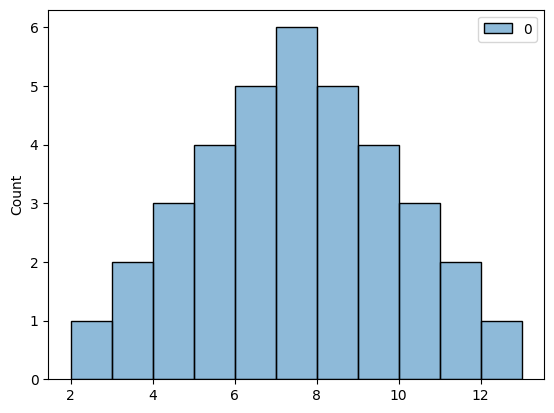

In [34]:
sns.histplot(x_df, bins = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])

plt.show() # Here we can show mean = median = mode this is normal skewed

## Random Variables

In [35]:
# Note: there are two type of Randome Variable   
# 1. Discret Variable: Countable number of distinct values. ex. Dice, Passo
# 2. Value that in given range and Interval ex. 2.3, 5.2 but in range

## Probaility:

### Formula of Probaility: $$ P(A) = \frac{\text{Number of times A occurs}}{\text{Total number of possible outcomes}} $$

In [36]:
# in dice probaility of 4 is 1/6

## Probability Distribution & Function

In [37]:
# Note: There are two types of Probability Distribution:
# 1. Discrete Probability Distribution -- netural value
# 2. Continuous Probability Distribution -- Floating Value

In [38]:
# Note: There are Three type of Probability Function:
# 1. Probability Density Function (PDF)
# 2. Probability Mass Function (PMF)
# 3. Cumulative Density Function (CDF)

# Covariance and Correlation

## Covariance

### Note: covariance signifies the direction of the linear relationsip between the two variables.

### Formula: $$ \text{Cov}(x,y) = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{N} $$

In [39]:
# we have two columns x and y. 
# if x increase and y also increase then it's clled Positive Covariance
# if x decrease and y increase then it's called Nagative Covarance
# if x change but y have same value (y stable) then it's called zero(0) no-Covariance
# Data range in -∞ to +∞

## Correlation

### Formula: $$\text{Correlation} = \frac{\text{Cov}(x,y)}{\sigma_x \cdot \sigma_y}$$

In [40]:
# Note: Covariation and Correlation is almost same but main difference is range 
# Correlaton have value only in (-1 to 1) to Analysis better than Covariation
# we just convert -∞ to +∞ to -1 to 1 for better Understanding
# for that std of x and std of y jjust devide by covariance.

In [41]:
# in machine learning we cut that in four part
# ----------------------------------------------------
# -1         -0.5           0          0.5           1
# 0 to -0.5 --> Week Negative Correlation
# -0.5 to -1 --> Strong Negative Correlation
# 0 to 0.5 --> week Positive Correlation
# 0.5 to 1 --> Strong Positive Correlation

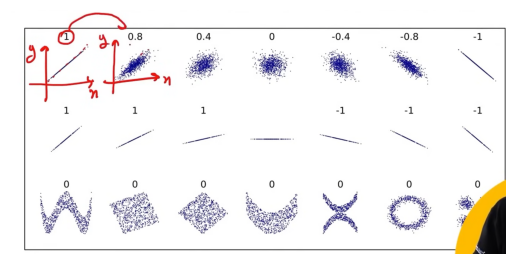

In [42]:
import matplotlib.image as mpimg

# read and display image
img = mpimg.imread('Correlation chart.png')
plt.imshow(img)
plt.axis('off')  # hide axes
plt.show()

In [43]:
tips_df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [44]:
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [45]:
tips_corr = tips_df.select_dtypes(['float64', 'int64']).corr()
tips_corr
# Find correlation here all of them value between 0 to 1

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [46]:
tips_cov = tips_df.select_dtypes(['float64', 'int64']).cov()
tips_cov
# Find Covariance of data range infinity

,total_bill,tip,size
total_bill,79.252939,8.323502,5.065983
tip,8.323502,1.914455,0.643906
size,5.065983,0.643906,0.904591


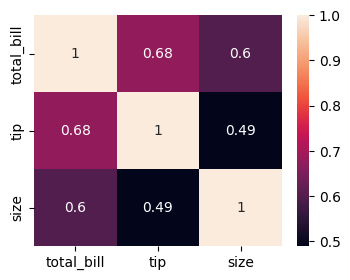

In [47]:
# Correlation of tips_corr Heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(tips_corr, annot=True)
plt.show()

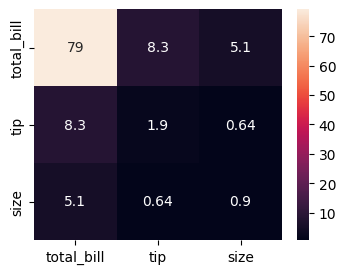

In [48]:
# Covariation of tips_corr Heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(tips_cov, annot=True)
plt.show()

## Central Limit Theorem (CLT)

In [49]:
# Centeral limit theorem is known as cut population data into sample data and find mean both are almost same
# Condition:
# 1. We must need to choose data Randomaly not contiously
# 2. Sample data is no more than 10%
# 3. we must need to select more than 30 record

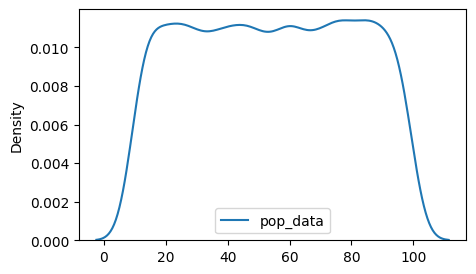

In [50]:
# Let's create Synthetic Data
pop_data = np.random.randint(10, 100, size=10000)

pop_table = pd.DataFrame({'pop_data':pop_data})

plt.figure(figsize=(5, 3))
sns.kdeplot(pop_table)
plt.show()

In [51]:
print(pop_data)

[60 25 24 ... 10 45 46]


In [52]:
Sample_M = []
for i in range(100):
    Sample_test = []
    for j in range(500):
        Sample_test.append(np.random.choice(pop_data))
    Sample_M.append(np.mean(Sample_test))
print(Sample_M)
print(np.mean(pop_table))
print(np.mean(Sample_M))

[np.float64(56.018), np.float64(53.518), np.float64(54.702), np.float64(55.052), np.float64(53.516), np.float64(55.676), np.float64(54.536), np.float64(53.812), np.float64(53.916), np.float64(51.708), np.float64(54.758), np.float64(55.624), np.float64(52.12), np.float64(52.77), np.float64(54.47), np.float64(55.026), np.float64(53.844), np.float64(53.344), np.float64(52.946), np.float64(51.372), np.float64(54.496), np.float64(57.388), np.float64(54.392), np.float64(53.866), np.float64(53.336), np.float64(54.588), np.float64(54.766), np.float64(53.674), np.float64(55.67), np.float64(55.03), np.float64(54.044), np.float64(54.36), np.float64(55.412), np.float64(55.396), np.float64(54.446), np.float64(52.648), np.float64(54.932), np.float64(53.48), np.float64(51.876), np.float64(51.852), np.float64(54.522), np.float64(54.932), np.float64(54.04), np.float64(56.064), np.float64(55.54), np.float64(54.034), np.float64(52.368), np.float64(56.03), np.float64(53.748), np.float64(53.298), np.float6

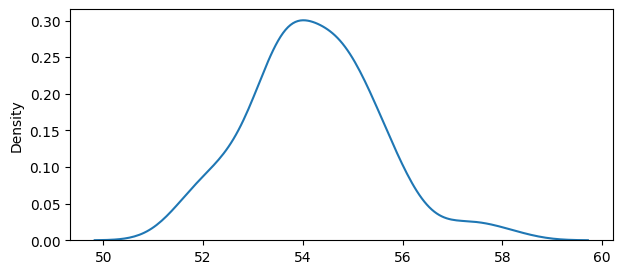

In [53]:
plt.figure(figsize=(7, 3))
sns.kdeplot(Sample_M)
plt.show()

## Hypothesis Testing

In [54]:
# There are two Terminology used in Hypotesis Testing:
# 1. Null Hypothesis: It's a Stastical Theory that Sudggests there is no stastical significance exists between two population. 
#                it's value is 0. also known as 'H0', most sign used: =, >=, <=
# 2. Alternative Hypothesis: it's sudgest there is a s ignificance difference between the Population Parameters. 
#                it's also known as (H1), most sign used: !=, <, >

# there is mainly three way to find:
# 1. Z-Test
# 2. T-Test
# 3. Chi Square Test

### Step of Hypothesis Testing:

In [55]:
# State null(H0) and alternative(H1) hypothesis
# Choose level of significance(a)
# Find critical values
# Find test statistic
# Draw your conclusion

In [56]:
# Population vs Sample Symbols in Statistics

# Population (all data)
# μ    -> population mean (average of all data)
# σ    -> population standard deviation (spread of all data)
# N    -> population size (total number of items in population)

# Sample (subset of population)
# x̄    -> sample mean (average of the sample)
# s     -> sample standard deviation (spread of the sample)
# n     -> sample size (number of items in the sample)

In [57]:
# Z-test and T-test work only on Average(Mean)

In [58]:
# if question say new one is best then check right tail
# if question say old tail is best then check left tail
# if nothing is write in question then we check both of tail and if domain say to take 0.5 then we choose both of side 0.025

In [59]:
# if we use from right side 0.05 means that point to the 0.95
# so go to z-table and find neary by 0.95
# and there is 0.9495 where y index is 1.6 and up side 0.004 we do both of sum 
# and that is 1.64 and that z-table value we are compare with our h0 or ha

# 📝 Z-Test Formulas for Quick Revision

---

## 1. One-Sample Z-Test
**Use:** Compare the **mean of a single sample** to a **known population mean** when the **population standard deviation (σ)** is known.

**Variables:**
$$
\begin{aligned}
\bar{x} & : \text{Sample mean (average of your sample)} \\
\mu & : \text{Population mean (hypothesized value)} \\
\sigma & : \text{Population standard deviation} \\
n & : \text{Sample size} \\
\end{aligned}
$$

**Formula:**
$$
Z = \frac{\bar{x} - \mu}{\sigma / \sqrt{n}}
$$

In [60]:
# A teacher claims that the mean score of student in his class greter than 82
# with Standard Deviasion of 20
# if a sample of 81 Students
# was selected with a mean score of 90

In [61]:
# In This algo:
# x̄ = Sample Mean
# μ = Population Mean
# σ = Population standard Deviasion
# n = Number of Sample data

In [62]:
import scipy.stats as st

# Given values
s_x = 90      # sample mean (x̄)
p_u = 82      # population mean (μ)
p_std = 20    # population standard deviation (σ)
n = 81        # sample size

# Step 1: Calculate Z-test statistic
z_cal = (s_x - p_u) / (p_std / np.sqrt(n))
print("Calculated Z value:", z_cal)

# Step 2: Critical Z value for one-tailed test at alpha=0.05
alpha = 0.05
z_critical = st.norm.ppf(1 - alpha)   # 1.645   # we can direct write 0.95
print("Critical Z value:", z_critical)

# Step 3: Decision rule
if z_cal > z_critical:
    print("Reject H0: Mean score is significantly greater than 82")
else:
    print("Fail to reject H0: Not enough evidence that mean score is greater than 82")

Calculated Z value: 3.5999999999999996
Critical Z value: 1.6448536269514722
Reject H0: Mean score is significantly greater than 82


## 2. Two-Sample Z-Test (Independent Samples)
**Use:** Compare the **means of two independent samples** when the **population standard deviations are known**.

**Variables:**
$$
\begin{aligned}
\bar{x}_1, \bar{x}_2 & : \text{Sample means of group 1 and group 2} \\
\mu_1, \mu_2 & : \text{Population means (hypothesized)} \\
\sigma_1, \sigma_2 & : \text{Population standard deviations} \\
n_1, n_2 & : \text{Sample sizes} \\
\end{aligned}
$$

**Formula:**
$$ Z = \frac{(\bar{x}_1 - \bar{x}_2) - (\mu_1 - \mu_2)}{\sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}} $$

In [63]:
# If data have no popular STD then we just essume new = old /or/ old = new

### Scenario
Imagine you work for an **e-commerce company**, and your team is responsible for analyzing customer purchase data.  
You want to determine whether a **new website design** has led to a **significant increase in the average purchase amount** compared to the old design.

### Data
You have collected data from a random sample of **30 customers** who made purchases on the **old website design**,  
and **30 customers** who made purchases on the **new website design**.  
You have the **sample means**, **sample standard deviations**, and **sample sizes** for both groups.

**Old Design Data**
[45.2, 42.8, 38.9, 43.5, 41.0, 44.6, 40.5, 42.7, 39.8, 41.4,
44.3, 39.7, 42.1, 40.6, 43.0, 42.2, 41.5, 39.6, 44.0, 43.1,
38.7, 43.9, 42.0, 41.9, 42.8, 43.7, 41.3, 40.9, 42.5, 41.6]

**New Design Data**
[48.5, 49.1, 50.2, 47.8, 48.7, 49.9, 48.0, 50.5, 49.8, 49.6,
48.2, 48.9, 49.7, 50.3, 49.4, 50.1, 48.6, 48.3, 49.0, 50.0,
48.4, 49.3, 49.5, 48.8, 50.6, 50.4, 48.1, 49.2, 50.7, 50.8]

**Population STD**: 2.5

In [64]:
# Given data
sample1 = np.array([45.2, 42.8, 38.9, 43.5, 41.0, 44.6, 40.5, 42.7, 39.8, 41.4,
                    44.3, 39.7, 42.1, 40.6, 43.0, 42.2, 41.5, 39.6, 44.0, 43.1,
                    38.7, 43.9, 42.0, 41.9, 42.8, 43.7, 41.3, 40.9, 42.5, 41.6])

sample2 = np.array([48.5, 49.1, 50.2, 47.8, 48.7, 49.9, 48.0, 50.5, 49.8, 49.6,
                    48.2, 48.9, 49.7, 50.3, 49.4, 50.1, 48.6, 48.3, 49.0, 50.0,
                    48.4, 49.3, 49.5, 48.8, 50.6, 50.4, 48.1, 49.2, 50.7, 50.8])

# Step 1: Sample statistics
x1 = np.mean(sample1)   # mean of old design
x2 = np.mean(sample2)   # mean of new design
n1 = len(sample1)
n2 = len(sample2)

# Step 2: Population parameters (assumed known)
μ1 = μ2 = 0             # under H0: no difference between means
σ1 = 2.5
σ2 = 2.5

# Step 3: Compute Z-statistic
Z = ((x2 - x1) - (μ1 - μ2)) / np.sqrt((σ1**2 / n1) + (σ2**2 / n2))

print("Mean (Old Design):", round(x1, 2))
print("Mean (New Design):", round(x2, 2))
print("Z-Statistic:", round(Z, 2))

# step 4: z-tabel
z_table = st.norm.ppf(0.95)
print(z_table)

# step 5: Final Conclustion
if Z > z_table:
    print("Ha is right")
else:
    print("H0 is right")

Mean (Old Design): 41.99
Mean (New Design): 49.35
Z-Statistic: 11.39
1.6448536269514722
Ha is right


## ✅ Quick Tips
1. Use **one-sample Z-test** for a single sample vs population mean.  
2. Use **two-sample Z-test** for comparing **two independent sample means**.  
3. **Right-tailed test:** Check if mean is significantly **greater**.  
4. **Left-tailed test:** Check if mean is significantly **smaller**.  
5. **Two-tailed test:** Check for **any significant difference**.  

# 📝 T-Test

In [65]:
# in this algo
# x̄ = Sample Mean
# μ = Population Mean
# s = Sample Standard Div..
# n = Number of Sample data
# note: Data must less than '<' 30

In [66]:
# here we are use T-table
# at there we need df
# so, df stand for degree of fredom 
# df = n - 1
# in T table there is only 30 rows, that's why our sample data must be lower than 30
# Quick Reminder: in ~ between is 0 left side minus value so left side we get -value
# so 0.05 of left side we get value -1.711
# we can do that with code importing "import scipy.stats as st"
# and then "st.t.ppf(0.05, 25-1)" t.ppf takes two arguments

## 1. One-Sample T-Test
**Use:** Compare the **mean of a single sample** with a **known population mean** when the **population standard deviation is unknown**.

**Variables:**
$$
\begin{aligned}
\bar{x} & : \text{Sample mean (average of your sample)} \\
\mu & : \text{Population mean (hypothesized)} \\
s & : \text{Sample standard deviation} \\
n & : \text{Sample size} \\
\end{aligned}
$$

**Formula:**
$$
t = \frac{\bar{x} - \mu}{s / \sqrt{n}}
$$

In [67]:
# A manufacturer claims that the average weight of a bag of potato chips is 150 grams.
# A sample of 25 bags is taken, and the sample has an average weight of 148 grams 
#    with a standard deviation of 5 grams.
# Test the manufacturer’s claim using a one-tailed t-test at a significance level of 0.05.

In [68]:
import scipy.stats as st

# Given values
s_x = 148     # sample mean (x̄)
p_u = 150     # population mean (μ)
s = 5         # sample standard deviation (s)
n = 25        # sample size

# Step 1: Calculate t-test statistic
t_cal = (s_x - p_u) / (s / np.sqrt(n))
print("Calculated t value:", t_cal)

# Step 2: Critical t value for one-tailed test at 0.05 significance
alpha = 0.05
df = n - 1  # degrees of freedom
t_critical = st.t.ppf(alpha, df)  # left-tailed test
print("Critical t value at 5% significance:", t_critical)

# Step 3: Conclusion
if t_cal < t_critical:
    print("Reject H0: The mean weight is significantly less than 150 grams")
else:
    print("Fail to reject H0: Not enough evidence that mean weight is less than 150 grams")

Calculated t value: -2.0
Critical t value at 5% significance: -1.7108820799094282
Reject H0: The mean weight is significantly less than 150 grams


## 2.Two-Sample T-Test
**Use:** Compare means of **two independent samples** without assuming equal population variances.

**Variables:**
$$
\begin{aligned}
\bar{x}_1, \bar{x}_2 & : \text{Sample means} \\
s_1, s_2 & : \text{Sample standard deviations} \\
n_1, n_2 & : \text{Sample sizes} \\
\end{aligned}
$$

**Formula:**
$$
t = \frac{(\bar{X}_A - \bar{X}_B) - (\mu_A - \mu_B)}{\sqrt{\frac{S_A^2}{n_A} + \frac{S_B^2}{n_B}}}
$$


In [69]:
# A company wants to test whether there is a difference in productivity between two teams, Team A and Team B.
# They randomly select 20 employees from each team and record their productivity scores.
# Team A has a mean productivity score of 80 with a standard deviation of 5.
# Team B has a mean productivity score of 75 with a standard deviation of 6.
# At a 5% level of significance, test whether there is a significant difference in productivity between the two teams.

In [70]:
# H0 => p1 - p2 = 0
# H1 => p1 - p2 != 0

In [71]:
# here we are use 2 tail
# here we need to prove h0 and h1 both so we need to use 2 tail
# we need to take 5% so both of side 2.5% and 2.5%
# for df we need to use 20 + 20 - 2

In [72]:
# Step 1: Given data
mean_a = 80
std_a = 5
n_a = 20

mean_b = 75
std_b = 6
n_b = 20

alpha = 0.05  # significance level

# Step 2: Calculate t-statistic
t_stat = (mean_a - mean_b) / np.sqrt((std_a**2/n_a) + (std_b**2/n_b))
print("T-Statistic:", t_stat)

# Step 3: Calculate degrees of freedom using Welch-Satterthwaite formula
df = n_a + n_b - 2
print("Degrees of Freedom:", df)

# Step 4: Find critical t-value for two-tailed test
t_critical = st.t.ppf(1 - alpha/2, df)
print("Critical t-value (two-tailed): ±", t_critical)

# Step 5: Decision
if abs(t_stat) > t_critical:
    print("Reject null hypothesis: There is a significant difference between the teams.")
else:
    print("Fail to reject null hypothesis: No significant difference between the teams.")

T-Statistic: 2.862991671569341
Degrees of Freedom: 38
Critical t-value (two-tailed): ± 2.024394163911969
Reject null hypothesis: There is a significant difference between the teams.


In [73]:
# A company wants to test whether a new training program improves the typing speed of its employees.
# The typing speed of 20 employees was recordd before and after the training program the data is given below.
# test at a 5% level of significance whether the training program has an effect on the typing speed of the employees.
# before= [50, 60, 45, 65, 55, 70, 40, 75, 80, 65, 70, 60, 50, 55, 45, 75, 60, 50, 65, 70]
# after = [55, 65, 50, 70, 60, 75, 45, 80, 85, 70, 75, 65, 55, 60, 50, 80, 65, 55, 70, 75]

In [74]:
# H0: There is no effect (mean difference = 0).
# H1: There is an effect (mean difference ≠ 0).

Before = np.array([50, 60, 45, 65, 55, 70, 40, 75, 80, 65, 70, 60, 50, 55, 45, 75, 60, 50, 65, 70])
After  = np.array([60, 70, 55, 75, 65, 80, 50, 85, 90, 70, 75, 65, 55, 60, 50, 80, 65, 55, 70, 75])

std_a = np.std(After)
std_b = np.std(Before)

mean_a = np.mean(After)
mean_b = np.mean(Before)

t_cal = (mean_a - mean_b) / np.sqrt((std_a**2)/len(After) + (std_b**2)/len(Before))
print("Independent t-statistic:", t_cal)

t_table = st.t.ppf(1-0.025, 19)
print('T table value: ', t_table)

print('here we can show there is no major difference between t_cal and t_table so both of are almost same so aftere treining there is no major difference')

Independent t-statistic: 2.061200527128206
T table value:  2.093024054408263
here we can show there is no major difference between t_cal and t_table so both of are almost same so aftere treining there is no major difference


## ✅ Quick Tips
1. **One-sample t-test:** Compare sample mean with population mean.  
2. **Right-tailed:** Check if mean is significantly **greater**.  
3. **Left-tailed:** Check if mean is significantly **smaller**.  
4. **Two-tailed:** Check for **any significant difference**.  

# Chi-Square Test (χ² Test)

The **Chi-Square test** is used to check whether there is a significant difference between **observed frequencies** and **expected frequencies**.

---

## Formula:

$$
\chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}
$$

Where:  
- \( O_i \) = Observed frequency (actual data collected)  
- \( E_i \) = Expected frequency (theoretical values if \( H_0 \) is true)  
- \( \chi^2 \) = Chi-square statistic

In [75]:
# At chi-Test we are use Chi-Table

In [76]:
# A fair die is rolled 120 times and the follwing results are obtained:
# face 1: 22 times
# face 2: 17 times
# face 3: 20 times
# face 4: 26 times
# face 5: 22 times
# face 6: 13 times
# Test at a 5% level of significance whether the die is fair

In [77]:
# h0: Die is fair
# h1: Die is higher

ob = np.array([22, 17, 20, 26, 22, 13]) # Obtain
ex = np.array([20, 20, 20, 20, 20, 20]) # Expected 120/6

chi = np.sum(np.square(ob-ex)/ex)

df = 5
chi_table = 11.7
alpha = 0.05

In [78]:
# A study was conducted to investigate whether there is a relationship between gender and the perferred genre of music.
# A sample of 235 people was selected, and the data collected is shown below. 
# Testt at a 5% level of significance whether there is a significant association between gender and music preference.

#        top    hip Hop    classical   rock
# Male    40       45          25        10
# Female  35       30          20        30

In [79]:
# H0: no Association
# h1: Have Association

row1 = np.array([40, 45, 25, 10])
row2 = np.array([35, 30, 20, 30])

# df = (row - 1) * (col - 1) = (2 - 1) * (4 - 1)
df = 3
alpha = 0.05
chi_table = 7.815

sum_r1 = np.sum(row1)
sum_r2 = np.sum(row2)
sum_col = row1 + row2
sum_row = np.array([sum_r1, sum_r2])

print(sum_r1)
print(sum_r2)
print(sum_col)
print(sum_row)

120
115
[75 75 45 40]
[120 115]


In [80]:
exp = []
for i in sum_row:
    for j in sum_col:
        value = (i * j)/ 235
        exp.append(value)
exp

[np.float64(38.297872340425535),
 np.float64(38.297872340425535),
 np.float64(22.97872340425532),
 np.float64(20.425531914893618),
 np.float64(36.702127659574465),
 np.float64(36.702127659574465),
 np.float64(22.02127659574468),
 np.float64(19.574468085106382)]

In [81]:
obj = np.array([40, 45, 25, 10, 35, 30, 20, 30])
len(obj) == len(exp)

True

In [82]:
np.sum(np.square(obj - exp)/exp)

np.float64(13.788747987117553)

In [83]:
# chi_table = 7.815 < 13.788747987117553
# Means They are Associated